#35=IfcCompositeCurve((#36,#48),.F.)


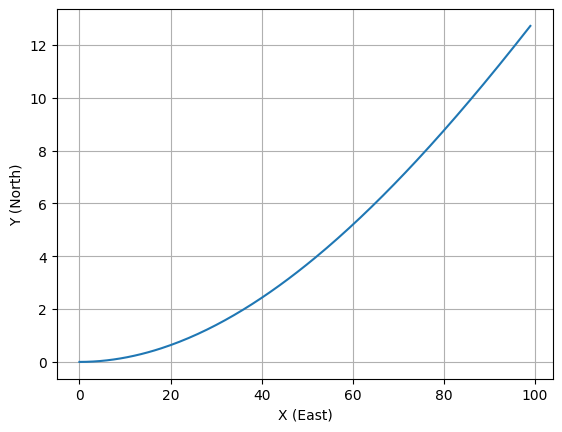

In [3]:
import ifcopenshell
import ifcopenshell.geom as geom
import numpy as np
import matplotlib.pyplot as plt

#model = ifcopenshell.open("F:/IfcAlignmentDriver/TestFiles/Alignment_only_v1.ifc")
#model = ifcopenshell.open("F:/IfcAlignmentDriver/TestFiles/github_min_example_IfcFixedReferenceSweptAreaSolid_IFC4x3_ADD2.ifc")
#model = ifcopenshell.open("F:/IfcAlignmentDriver/TestFiles/github_issue_5502_example_4.ifc")
#model = ifcopenshell.open("F:/IfcAlignmentDriver/TestFiles/00_LRT_BIM-Station_Platform edge SB LRT Track.ifc")
model = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__HorizontalAlignment_Clothoid_100.0_300_1000_1_Meter.ifc")

curves = model.by_type("IfcCompositeCurve",False)

settings = geom.settings()

fig1 = plt.figure().add_subplot()

for curve in curves:
    print(curve)
    shape = geom.create_shape(settings,curve)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    fig1.plot(x,y,label="#" + str(curve.id()))
    
#fig1.set_title("IfcCompositeCurve")
#fig1.legend(loc="upper left")
#fig1.axis("square")
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)
plt.show()
